# Cel projektu
Celem projektu jest przygotowanie metody obcinającej czaszki (skull stripping) na obrazach sekwencji typu T1 rezonansu magnetycznego (MRI) głowy. Metoda powinna z surowego skanu pacjenta wyodrębnić cały obszar zajmowany przez właściwy mózg, pomijając kości, inne tkanki miękkie itp. - ilustracja na rysunku poniżej:
![](https://www.researchgate.net/profile/Dario_Pompili/publication/309402865/figure/fig1/AS:420915604148224@1477365508110/Skull-stripping-steps-A-input-images-B-brain-contouring-and-C-removal-of.png)

Poniżej znajduje się przykładowy kod pobierający, rozpakowujący oraz wczytujący dane do macierzy `numpy` o trzech wymiarach. Dodatkowo załączona jest funkcja wizualizująca środkowe slice'y (przekroje) w każdej z trzech osi macierzy.


# Przykładowy kod z opisami

In [ ]:
!pip install --upgrade nibabel

Requirement already up-to-date: nibabel in /usr/local/lib/python3.6/dist-packages (3.1.0)


In [1]:
!rm -r FirstDataset
!rm -r SecondDataset
!wget "link hidden, data is not public"
!unzip -q public.zip
!rm public.zip

rm: cannot remove 'FirstDataset': No such file or directory
rm: cannot remove 'SecondDataset': No such file or directory
--2021-01-29 19:45:31--  https://putpoznanpl-my.sharepoint.com/:u:/g/personal/dominik_pieczynski_put_poznan_pl/EWIZ_xm8wXpMjQDgF2VQ1csB4QuHPKoj5vDpj6CQi9p-AA?e=yQr6fn&download=1
Resolving putpoznanpl-my.sharepoint.com (putpoznanpl-my.sharepoint.com)... 13.107.136.9
Connecting to putpoznanpl-my.sharepoint.com (putpoznanpl-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dominik_pieczynski_put_poznan_pl/Documents/Public.zip?originalPath=aHR0cHM6Ly9wdXRwb3puYW5wbC1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb21pbmlrX3BpZWN6eW5za2lfcHV0X3Bvem5hbl9wbC9FV0laX3htOHdYcE1qUURnRjJWUTFjc0I0UXVIUEtvajV2RHBqNkNRaTlwLUFBP3J0aW1lPU1OU0JjSTdFMkVn [following]
--2021-01-29 19:45:32--  https://putpoznanpl-my.sharepoint.com/personal/dominik_pieczynski_put_poznan_pl/Documents/Public.zip?originalPath=aHR0cHM6Ly9wdXRw

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!rm -r /content/drive/My Drive/imgzpo/ximage
!rm -r /content/drive/My Drive/imgzpo/xlabel
!mkdir /content/drive/My Drive/imgzpo/ximage
!mkdir /content/drive/My Drive/imgzpo/xlabel

rm: cannot remove '/content/drive/My': No such file or directory
rm: cannot remove 'Drive/imgzpo/ximage': No such file or directory
rm: cannot remove '/content/drive/My': No such file or directory
rm: cannot remove 'Drive/imgzpo/xlabel': No such file or directory
mkdir: cannot create directory ‘/content/drive/My’: Operation not supported
mkdir: cannot create directory ‘Drive/imgzpo/ximage’: No such file or directory
mkdir: cannot create directory ‘/content/drive/My’: Operation not supported
mkdir: cannot create directory ‘Drive/imgzpo/xlabel’: No such file or directory


In [ ]:
!pip install --upgrade nibabel

In [ ]:
import numpy as np
import nibabel as nib
import cv2
from typing import Tuple, List
from pathlib import Path
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def load_raw_volume(path: Path) -> Tuple[np.ndarray, np.ndarray]:
  data: nib.Nifti1Image = nib.load(str(path))
  data = nib.as_closest_canonical(data)
  raw_data = data.get_fdata(caching='unchanged', dtype=np.float32)
  return raw_data, data.affine


def load_labels_volume(path: Path) -> np.ndarray:
  return load_raw_volume(path)[0].astype(np.uint8)


def save_labels(data: np.ndarray, affine: np.ndarray, path: Path):
  nib.save(nib.Nifti1Image(data, affine), str(path))


def show_slices(slices: List[np.ndarray]):
   fig, axes = plt.subplots(1, len(slices))
   for i, data_slice in enumerate(slices):
       axes[i].imshow(data_slice.T, cmap="gray", origin="lower")

In [ ]:


raw_volume, affine = load_raw_volume('/content/FirstDataset/train/e66ce7e96b277d7d1b8835e5d2c94cd6.nii.gz')
mask_volume = load_labels_volume('/content/FirstDataset/train/e66ce7e96b277d7d1b8835e5d2c94cd6_mask.nii.gz')

show_slices([raw_volume[raw_volume.shape[0] // 2], # Środkowy slice 2D w osi x
             raw_volume[:, raw_volume.shape[1] // 2], # Środkowy slice 2D w osi y
             raw_volume[:, :, raw_volume.shape[2] // 2]]) # Środkowy slice 2D w osi z

show_slices([mask_volume[mask_volume.shape[0] // 2], # Środkowy slice 2D w osi x
             mask_volume[:, mask_volume.shape[1] // 2], # Środkowy slice 2D w osi y
             mask_volume[:, :, mask_volume.shape[2] // 2]]) # Środkowy slice 2D w osi z


In [ ]:


first_dataset_path = Path('/content/FirstDataset/train')
second_dataset_path = Path('/content/SecondDataset/train')
savepoint = Path('/content/drive/My Drive/imgzpo')
fixcolor = Path('/content/drive/My Drive/imgzpo/x/images/images')

# Zmienna affine zawiera macierz, która będzie potrzebna przy zapisie predykcji do pliku


for dir in os.listdir(second_dataset_path):
  next_path = os.path.join(second_dataset_path,dir)
  for file in os.listdir(next_path):
    if 'mask.nii.gz' in file:
      mask_volume = load_labels_volume(str(next_path)+'/'+str(file))
      for i in range(20,140,20):
        mask = mask_volume[i,:,:]
        plt.imsave(str(savepoint)+'/x/labels/labels/'+str(dir)+str(i)+'.png',mask,cmap="gray", vmin=0, vmax=1)
    else:
      raw_volume, affine = load_raw_volume(str(next_path)+'/'+str(file))
      for i in range(20,140,20):
        raw = raw_volume[i,:,:]
        plt.imsave(str(savepoint)+'/x/images/images/'+str(dir)+str(i)+'.png',raw,cmap="gray")


for i, file in enumerate(os.listdir(first_dataset_path)):
    if file.endswith('mask.nii.gz'):
      mask_volume = load_labels_volume(str(first_dataset_path)+'/'+str(file))
      for i in range(20,140,20):
        mask = mask_volume[i,:,:]
        plt.imsave(str(savepoint)+'/x/labels/labels/'+str(file)+str(i)+'.png',mask, cmap="gray", vmin=0, vmax=1)
    elif file.endswith('nii.gz'):
      raw_volume, affine = load_raw_volume(str(first_dataset_path)+'/'+str(file))
      for i in range(20,140,20):
        raw = raw_volume[i,:,:]
        plt.imsave(str(savepoint)+'/x/images/images/'+str(file)+str(i)+'.png',raw, cmap="gray")


In [ ]:
!pip install segmentation_models

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import segmentation_models as sm
from tensorflow import keras
from PIL import Image


datagen_params = dict(
    validation_split=0.15,

    vertical_flip=True,
    rescale = 1 / 255
)

images_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **datagen_params
)

masks_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **datagen_params
)

target_size = (256,256)

input_images_generator = images_datagen.flow_from_directory(
    '/content/drive/My Drive/imgzpo/x/images/',
    target_size=target_size,
    batch_size=128,
    class_mode=None,
    seed=42,
    subset='training'
)

input_masks_generator = masks_datagen.flow_from_directory(
    '/content/drive/My Drive/imgzpo/x/labels/',
    target_size=target_size,
    batch_size=128,
    class_mode=None,
    seed=42,
    subset='training'
)

val_images_generator = images_datagen.flow_from_directory(
    '/content/drive/My Drive/imgzpo/x/images/',
    target_size=target_size,
    batch_size=128,
    class_mode=None,
    seed=42,
    subset='validation'
)

val_masks_generator = masks_datagen.flow_from_directory(
    '/content/drive/My Drive/imgzpo/x/labels/',
    target_size=(target_size),
    batch_size=128,
    class_mode=None,
    seed=42,
    subset='validation'
)

train_combined_generator = zip(input_images_generator, input_masks_generator)
validation_combined_generator = zip(val_images_generator, val_masks_generator)

In [ ]:
def down_block(x, filters, kernel_size=(3,3), padding="same", strides=1):
  c = keras.layers.Conv2D(filters,kernel_size,padding=padding,strides=strides,activation="relu")(x)
  c = keras.layers.Conv2D(filters,kernel_size,padding=padding,strides=strides,activation="relu")(c)
  p = keras.layers.MaxPool2D((2,2), (2,2))(c)
  return c,p

def up_block(x,skip,filters,kernel_size=(3,3), padding="same", strides=1):
  us = keras.layers.UpSampling2D((2,2))(x)
  concat = keras.layers.Concatenate()([us,skip])
  c = keras.layers.Conv2D(filters,kernel_size,padding=padding,strides=strides,activation="relu")(concat)
  c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides,activation="relu")(c)
  return c 

def bottleneck(x, filters, kernel_size=(3,3), padding="same", strides=1):
  c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides,activation="relu")(x)
  c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides,activation="relu")(c)
  return c

In [ ]:
def Unet():
  f = [8,16,32,64,128,256]
  inputs = keras.layers.Input((256,256,3))

  p0 = inputs
  c1,p1 = down_block(p0,f[0]) # 
  c2,p2 = down_block(p1,f[1]) #
  c3,p3 = down_block(p2,f[2]) #
  c4,p4 = down_block(p3,f[3]) #
  c5,p5 = down_block(p4,f[4]) #

  bn = bottleneck(p5, f[5])

  u1 = up_block(bn, c5, f[4]) #
  u2 = up_block(u1, c4, f[3]) #
  u3 = up_block(u2, c3, f[2]) #
  u4 = up_block(u3, c2, f[1]) #
  u5 = up_block(u4,c1,f[0]) #

  outputs = keras.layers.Conv2D(1,(3,3), padding="same", activation="sigmoid")(u5)
  model = keras.models.Model(inputs,outputs)
  return model

In [2]:
model = Unet()
loss = sm.losses.DiceLoss()
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3), loss="binary_crossentropy", metrics=["acc"])
model.summary()

NameError: ignored

In [ ]:
training_samples = input_images_generator.n
validation_samples = val_images_generator.n

model.fit(
  train_combined_generator,
  steps_per_epoch=training_samples//128,
  epochs=20,
  validation_data=validation_combined_generator, 
  validation_steps=validation_samples//128
)

Epoch 1/20
15/15 [==============================] - 2556s 170s/step - loss: 0.5496 - acc: 0.8576 - val_loss: 0.3353 - val_acc: 0.8604
Epoch 2/20
15/15 [==============================] - 718s 48s/step - loss: 0.2179 - acc: 0.8621 - val_loss: 0.1691 - val_acc: 0.8633
Epoch 3/20
15/15 [==============================] - 740s 49s/step - loss: 0.1606 - acc: 0.8629 - val_loss: 0.1506 - val_acc: 0.8601
Epoch 4/20
15/15 [==============================] - 722s 48s/step - loss: 0.1532 - acc: 0.8618 - val_loss: 0.2009 - val_acc: 0.8613
Epoch 5/20
15/15 [==============================] - 690s 46s/step - loss: 0.1678 - acc: 0.8618 - val_loss: 0.1577 - val_acc: 0.8610
Epoch 6/20
15/15 [==============================] - 694s 46s/step - loss: 0.1428 - acc: 0.9312 - val_loss: 0.1381 - val_acc: 0.9576
Epoch 7/20
15/15 [==============================] - 697s 46s/step - loss: 0.1473 - acc: 0.9571 - val_loss: 0.1482 - val_acc: 0.9567
Epoch 8/20
15/15 [==============================] - 693s 46s/step - loss: 

In [ ]:
model.save_weights("/content/drive/My Drive/imgzpo/finalxmodel/unet.hp")
model.save('/content/drive/My Drive/imgzpo/finalxmodel/')

INFO:tensorflow:Assets written to: /content/drive/My Drive/imgzpo/finalxmodel/assets


In [ ]:
loaded = tf.keras.models.load_model('/content/drive/My Drive/imgzpo/finalxmodel/')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/imgzpo/xweights/model/assets


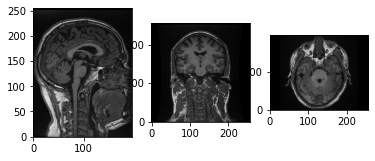

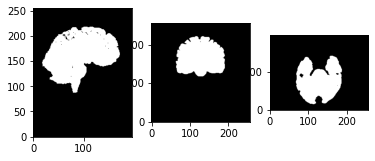

In [ ]:
raw_volume, affine = load_raw_volume('/content/FirstDataset/train/011e40c2b1d3c9bb53bd9e5a7efd04ba.nii.gz')
mask_volume = load_labels_volume('/content/FirstDataset/train/011e40c2b1d3c9bb53bd9e5a7efd04ba_mask.nii.gz')

show_slices([raw_volume[raw_volume.shape[0] // 2], # Środkowy slice 2D w osi x
             raw_volume[:, raw_volume.shape[1] // 2], # Środkowy slice 2D w osi y
             raw_volume[:, :, raw_volume.shape[2] // 2]]) # Środkowy slice 2D w osi z

show_slices([mask_volume[mask_volume.shape[0] // 2], # Środkowy slice 2D w osi x
             mask_volume[:, mask_volume.shape[1] // 2], # Środkowy slice 2D w osi y
             mask_volume[:, :, mask_volume.shape[2] // 2]]) # Środkowy slice 2D w osi z



256
(256, 256)


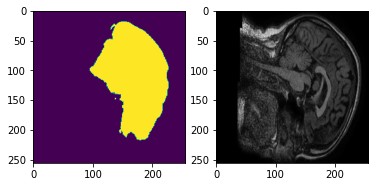

In [ ]:

# raw_volume, affine = load_raw_volume('/content/FirstDataset/test/026719ab1b8e2af45a41ee5b629a12bd.nii.gz')
# plt.imsave('/content/drive/My Drive/imgzpo/test/testx1.png', raw_volume[raw_volume.shape[0] // 2], cmap="gray")

test = plt.imread('/content/drive/My Drive/imgzpo/test/testx1.png')
test = cv2.resize(test,(256,256)).astype(np.float32)
test = cv2.cvtColor(test, cv2.COLOR_BGRA2BGR)
#plt.imshow(test)
print(test.shape[0])

result = loaded.predict(test[None,:])
result = result.squeeze()
print(result.shape)
#plt.imshow(result)

label = np.zeros(result.shape,dtype=np.uint8)
label[result >0.4] = 1
label[label != 1] = 0
#plt.imshow(label)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(label)
axes[1].imshow(test)


In [ ]:
# Sprawdźmy rozmiar wokseli

for scan_path in first_dataset_path.iterdir():
  if scan_path.name.endswith('mask.nii.gz'):
    print(nib.load(str(scan_path)).header.get_zooms())


for scan_path in second_dataset_path.iterdir():
  print(nib.load(str(scan_path / 'T1w.nii.gz')).header.get_zooms())


Fizyczne rozmiary wokseli są do siebie podobne - raczej nie musimy nic robić z różnicami rzędu 0.2 - 0.3 mm. Alternatywą byłoby wykorzystanie na przykład funkcji `zoom` z biblioteki `scipy` (uwaga - jest wolna). Obecne tutaj różnice mogą nawet paradoksalnie poprawić generalizację sieci.

Na tym etapie należy podzielić dane (najprawdopodobniej ścieżki do nich po wczytaniu ich listy w Pythonie) na zbiór treningowy i walidacyjny, a następnie wyeksportować podzielone dane do dwuwymiarowych obrazów - najlepiej w bezstratnym formacie PNG.

Sugerowany jest podział na zbiór treningowy i walidacyjny już w wyeksportowanych danych na dysku, ale można go oczywiście realizować podczas wczytywania ścieżek danych do uczenia w kodzie źródłowym. Zachęcamy do eksperymentów, ale zaznaczamy, że zazwyczaj lepiej jest przenosić do zbioru walidacyjnego całe skany, a nie losowe przekroje. Przeniesienie losowych przekrojów powoduje, że sieć jest walidowana na fragmencie skanu, którego inne fragmenty są w zbiorze treningowym - mamy gorszą kontrolę przeuczenia, ale z drugiej strony sieć "widzi" podczas treningu więcej różnych skanów.

Przy eksporcie wymagane będzie przeiterowanie się po obu zbiorach danych, wczytywanie kolejnych skanów do pamięci (jak wyżej, ale z wykorzystaniem załączonych funkcji wczytujących), a następnie eksport danych w wybranej osi. Kopię wyeksportowanych danych warto umieścić na podmontowanym Dysku Google. W sytuacji wygaśnięcia sesji Colaba umożliwi to ich późniejsze przekopiowanie na maszynę docelową bez powtarzania procesu eksportu.

Po wyeksportowaniu danych można wykorzystać podejście znane z instrukcji dotyczącej segmentacji. Można testować różne przekroje danych (ostateczne podejście nie musi wcale być jedną siecią - można nauczyć modele dla każdego przekroju), różne modele sieci neuronowych (w tym z pretreningiem i bez), różne loss functions, różne learning rates, różne augmentacje, różne rodzaje normalizacji danych itd.

Po wytrenowaniu ostatecznego modelu można wygenerować predykcje dla zbioru testowego. Poniżej znajduje się ogólnikowy przykład generowania predykcji.

In [ ]:
predictions_base_path = Path('/content/drive/My Drive/imgzpo/Predictions')
first_dataset_predictions_path = predictions_base_path / 'first'
second_dataset_predictions_path = predictions_base_path / 'second'

first_dataset_predictions_path.mkdir(exist_ok=True, parents=True)
second_dataset_predictions_path.mkdir(exist_ok=True, parents=True)


In [ ]:
first_dataset_test_path = Path('/content/FirstDataset/test')
second_dataset_test_path = Path('/content/SecondDataset/test')

for scan_path in first_dataset_test_path.iterdir():
  data, affine = load_raw_volume(scan_path)
  labels = np.zeros(data.shape, dtype=np.uint8)

  x_slice,y_slice,z_slice = data.shape

  for i in range(data.shape[0]):
    cut_data = data[i,:,:]
    plt.imsave(str(first_dataset_predictions_path)+'/'+'tmp.png',cut_data,cmap="gray")

    _data = plt.imread(str(first_dataset_predictions_path)+'/'+'tmp.png')
    _data = cv2.resize(_data,(256,256)).astype(np.float32)
    _data = cv2.cvtColor(_data, cv2.COLOR_BGRA2BGR)

    result = loaded.predict(_data[None,:])
    result = result.squeeze()

    label = np.zeros(result.shape,dtype=np.uint8)
    label[result >0.5] = 1
    label[label != 1] = 0
    label = cv2.resize(label, (cut_data.shape[1],cut_data.shape[0])).astype(np.uint8)
    labels[i,:,:] = label

  # Tutaj należy przeiterować się na przykład po jednej z osi, wykonać predykcję dla każdego przekroju i wpisać do macierzy labels
  # UWAGA - maska powinna zawierać jedynie wartości 0 i 1
  # UWAGA - predykcje są liczbami zmiennoprzecinkowymi z zakresu 0 do 1 - należy je zbinaryzować wybierając jakiś próg (na przykład 0.5)
  
  save_labels(labels, affine, first_dataset_predictions_path / f'{scan_path.name}')

for scan_path in second_dataset_test_path.iterdir():
  data, affine = load_raw_volume(scan_path / 'T1w.nii.gz')
  labels = np.zeros(data.shape, dtype=np.uint8)

  for i in range(data.shape[0]):
    cut_data = data[i,:,:]
    plt.imsave('/content/drive/My Drive/imgzpo/tmp.png',cut_data,cmap="gray")

    _data = plt.imread('/content/drive/My Drive/imgzpo/tmp.png')
    _data = cv2.resize(_data,(256,256)).astype(np.float32)
    _data = cv2.cvtColor(_data, cv2.COLOR_BGRA2BGR)

    result = loaded.predict(_data[None,:])
    result = result.squeeze()

    label = np.zeros(result.shape,dtype=np.uint8)
    label[result >0.5] = 1
    label[label != 1] = 0
    label = cv2.resize(label, (cut_data.shape[1],cut_data.shape[0])).astype(np.uint8)
    labels[i,:,:] = label

  # Tutaj należy przeiterować się na przykład po jednej z osi, wykonać predykcję dla każdego przekroju i wpisać do macierzy labels
  # UWAGA - maska powinna zawierać jedynie wartości 0 i 1
  # UWAGA - predykcje są liczbami zmiennoprzecinkowymi z zakresu 0 do 1 - należy je zbinaryzować wybierając jakiś próg (na przykład 0.5)
  
  save_labels(labels, affine, second_dataset_predictions_path / f'{scan_path.name}.nii.gz')

In [ ]:
import requests
import zlib

predictions_base_path = Path('/content/drive/My Drive/imgzpo/Predictions')
first_dataset_predictions_path = predictions_base_path / 'first'
second_dataset_predictions_path = predictions_base_path / 'second'


for dataset_predictions_path in (first_dataset_predictions_path, second_dataset_predictions_path):
  for prediction_path in dataset_predictions_path.iterdir():
    prediction_name = prediction_path.name[:-7]  # Usuwanie '.nii.gz' z nazwy pliku
    prediction = nib.load(str(prediction_path))

    response = requests.post(f'http://vision.dpieczynski.pl:8080/{prediction_name}', data=zlib.compress(prediction.to_bytes()))
    if response.status_code == 200:
        print(dataset_predictions_path.name, prediction_path.name, response.json())
    else:
        print(f'Error processing prediction {dataset_predictions_path.name}/{prediction_name}: {response.text}')

first 58a8d8769de9dff220a9f520d4a30b52.nii.gz {'dice': 0.9463737905452642, 'auc': 0.9831014004346307}
first d0858c4acdecad0b89bae8e1c55ee92c.nii.gz {'dice': 0.9592380635334923, 'auc': 0.9887061310490455}
first bde813ee1e995313a15263d7f2cb6ea3.nii.gz {'dice': 0.9297305692906384, 'auc': 0.9769087272663843}
first 64051b3483da339bf5792b5820faf6ae.nii.gz {'dice': 0.957852297483282, 'auc': 0.9758688579021441}
first 74754999f39999d6c84baaef2d710e85.nii.gz {'dice': 0.9607783776139093, 'auc': 0.9795093363173694}
first a397a235d426b16ed9062ea5c3e8e734.nii.gz {'dice': 0.9578633659315214, 'auc': 0.9811480334532382}
first a7973aaf43e08fd4ceaa47bcc57bebc2.nii.gz {'dice': 0.9642320842819501, 'auc': 0.9870227732642674}
first befd2995b6337f1427a97c7f478821bc.nii.gz {'dice': 0.9615700493746762, 'auc': 0.9839220289353336}
first 8af689e154c363a263c89943cfaa3e90.nii.gz {'dice': 0.9307252617945438, 'auc': 0.9821202169313668}
first 822038956654005e13e96fda68b5c20e.nii.gz {'dice': 0.9496063405964702, 'auc': 0

Tak przygotowany katalog `Predictions` należy wgrać do systemu Moodle do oceny.